### **Problem Statement**
Walmart wants to analyze customer purchase behavior, specifically the purchase amount, against factors like gender, marital status, and age. The goal is to understand if spending habits differ between male and female customers, married and unmarried customers, and across different age groups. This analysis will help Walmart make data-driven decisions to improve customer experience and sales.


### **Jupyter Notebook & PDF**
You can access the detailed analysis and code in the Jupyter Notebook or PDF here: [Walmart Analysis Notebook](https://drive.google.com/drive/folders/1-XxUm6F76ZVm4MAe0Me5MQV81xnrJeWP?usp=drive_link).




---

### **Dataset Overview**
The dataset contains transactional data of customers who purchased products during Black Friday. The features include:
- **User_ID**: Unique identifier for each user.
- **Product_ID**: Unique identifier for each product.
- **Gender**: Gender of the user (Male/Female).
- **Age**: Age group of the user (binned).
- **Occupation**: Occupation of the user (masked).
- **City_Category**: Category of the city (A, B, C).
- **StayInCurrentCityYears**: Number of years the user has stayed in the current city.
- **Marital_Status**: Marital status of the user (0 = Unmarried, 1 = Married).
- **Product_Category**: Category of the product purchased (masked).
- **Purchase**: Purchase amount in dollars.

---


#### **1. Importing and Basic Data Exploration**
- **Shape of Data**: The dataset contains 537,577 rows and 10 columns.
- **Data Types**:
  - Categorical: Gender, Age, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category.
  - Numerical: User_ID, Product_ID, Purchase.
- **Statistical Summary**:
  - The average purchase amount is approximately 9,263.

  - The minimum purchase amount is 12 and the maximum is 23,959.

  - 75% of customers spend less than 12,047.


In [2]:
# Load the dataset
df = pd.read_csv("/content/walmart_data.csv")

# Display the first 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check data types
print("\nData types:")
print(df.dtypes)

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

Shape of the dataset: (550068, 10)

Data types:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Statistical summary:
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        

#### **2. Missing Values and Outliers**
- **Missing Values**: No missing values were detected in the dataset.
- **Outliers**:
  - Using boxplots, outliers were detected in the `Purchase` column. However, these are valid purchase amounts and not errors, so they were retained.

Missing values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


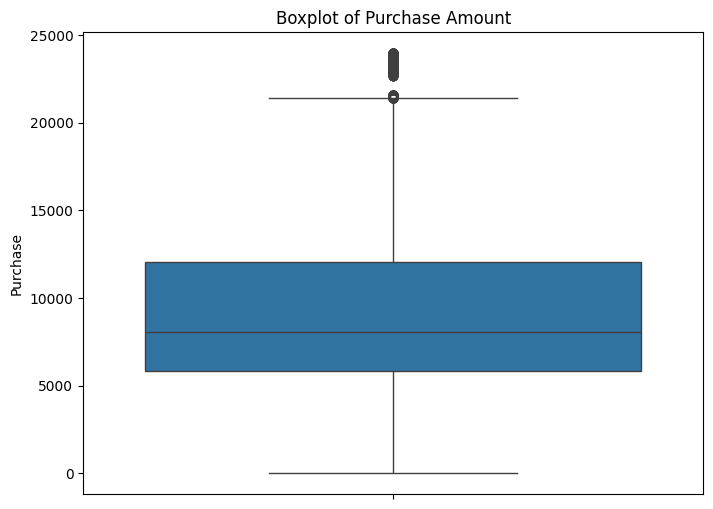

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Boxplot to detect outliers in Purchase column
plt.figure(figsize=(8, 6))
sns.boxplot(df['Purchase'])
plt.title("Boxplot of Purchase Amount")
plt.show()

#### **3. Data Exploration**
- **Gender Analysis**:
  - Male customers make up the majority of the dataset (75%).
  - The average purchase amount for females is **8,731**, while for males, it is **9,434**.
  - **Conclusion**: On average, male customers spend more per transaction than female customers.

Average purchase amount by gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


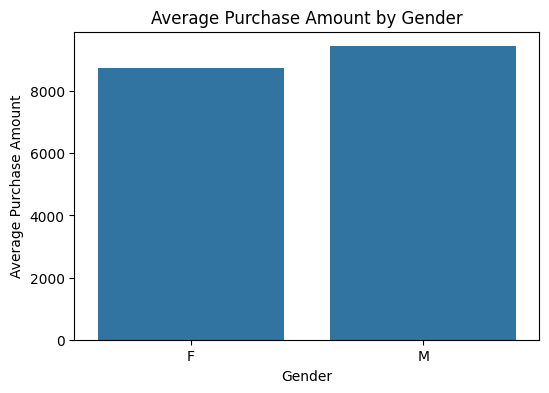

In [5]:
# Average purchase amount by gender
gender_avg = df.groupby('Gender')['Purchase'].mean()
print("Average purchase amount by gender:")
print(gender_avg)

# Bar plot for average purchase by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_avg.index, y=gender_avg.values)
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount")
plt.show()

- **Marital Status Analysis**:
  - Married customers (Marital_Status = 1) have an average purchase amount of **9,306**, while unmarried customers (Marital_Status = 0) have an average purchase amount of **9,237**.
  - **Conclusion**: Married customers spend slightly more than unmarried customers.

Average purchase amount by marital status:
Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


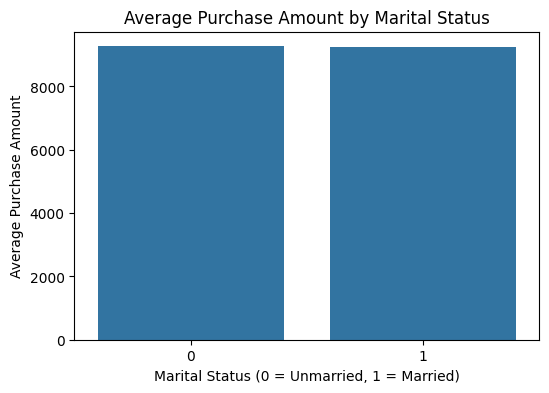

In [6]:
# Average purchase amount by marital status
marital_avg = df.groupby('Marital_Status')['Purchase'].mean()
print("Average purchase amount by marital status:")
print(marital_avg)

# Bar plot for average purchase by marital status
plt.figure(figsize=(6, 4))
sns.barplot(x=marital_avg.index, y=marital_avg.values)
plt.title("Average Purchase Amount by Marital Status")
plt.xlabel("Marital Status (0 = Unmarried, 1 = Married)")
plt.ylabel("Average Purchase Amount")
plt.show()

- **Age Analysis**:
  - Customers aged **51-55** spend the most on average (**9,535**), followed by those aged **36-45** (**9,445**).
  - Customers aged **0-17** spend the least on average (**8,933**).
  - **Conclusion**: Older customers tend to spend more than younger customers.

Average purchase amount by age group:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


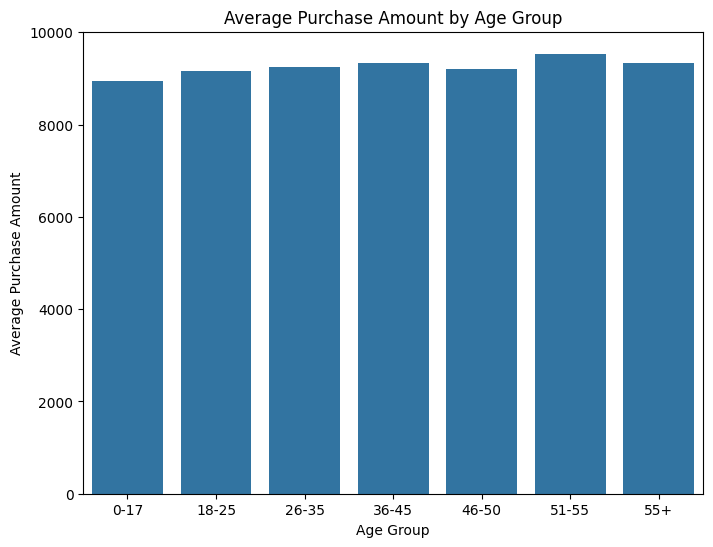

In [7]:
# Average purchase amount by age group
age_avg = df.groupby('Age')['Purchase'].mean()
print("Average purchase amount by age group:")
print(age_avg)

# Bar plot for average purchase by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=age_avg.index, y=age_avg.values)
plt.title("Average Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.show()

---

### **Confidence Interval Analysis**
Using the Central Limit Theorem (CLT), we calculated the confidence intervals for the average purchase amounts for male and female customers.

- **Female Customers**:
  - Sample Mean: $8,731
  - 95% Confidence Interval: [8,698, 8,764]

- **Male Customers**:
  - Sample Mean: $9,434
  - 95% Confidence Interval: [9,410, 9,458]

**Observation**: The confidence intervals for male and female customers do not overlap. This indicates that the difference in average spending between genders is statistically significant.

---

In [8]:
# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    margin = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - margin, mean + margin

# Confidence interval for female customers
female_purchase = df[df['Gender'] == 'F']['Purchase']
female_ci = confidence_interval(female_purchase)
print("95% Confidence Interval for Female Customers:", female_ci)

# Confidence interval for male customers
male_purchase = df[df['Gender'] == 'M']['Purchase']
male_ci = confidence_interval(male_purchase)
print("95% Confidence Interval for Male Customers:", male_ci)

95% Confidence Interval for Female Customers: (8709.21132117373, 8759.92020913722)
95% Confidence Interval for Male Customers: (9422.019402055814, 9453.032678888716)


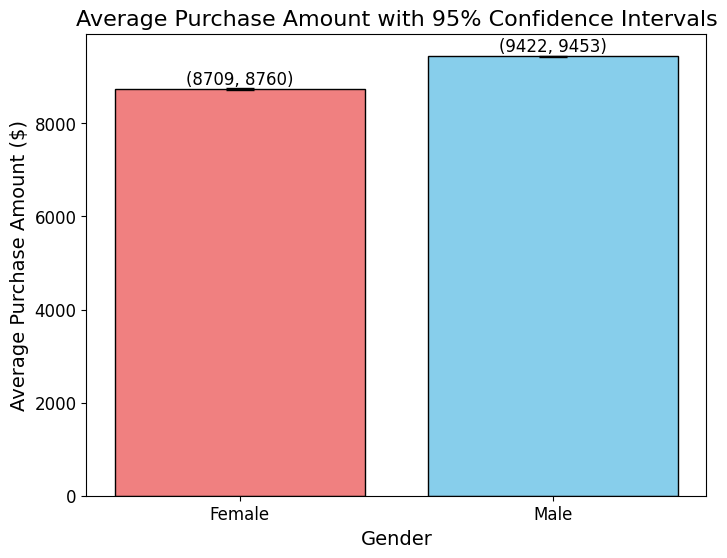

In [13]:
# Data for plotting
genders = ['Female', 'Male']
means = [female_purchase.mean(), male_purchase.mean()]
ci_lower = [female_ci[0], male_ci[0]]
ci_upper = [female_ci[1], male_ci[1]]

# Create the plot
plt.figure(figsize=(8, 6))
bars = plt.bar(genders, means, yerr=[means[i] - ci_lower[i] for i in range(len(means))],
               capsize=10, color=['lightcoral', 'skyblue'], edgecolor='black')

# Add labels and title
plt.title("Average Purchase Amount with 95% Confidence Intervals", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Average Purchase Amount ($)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add confidence interval values as text annotations
for i, (mean, lower, upper) in enumerate(zip(means, ci_lower, ci_upper)):
    plt.text(i, mean + 100, f"({lower:.0f}, {upper:.0f})", ha='center', fontsize=12, color='black')

plt.show()

<ipython-input-14-bdd6034f2d7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase', data=df, palette=['lightcoral', 'skyblue'])


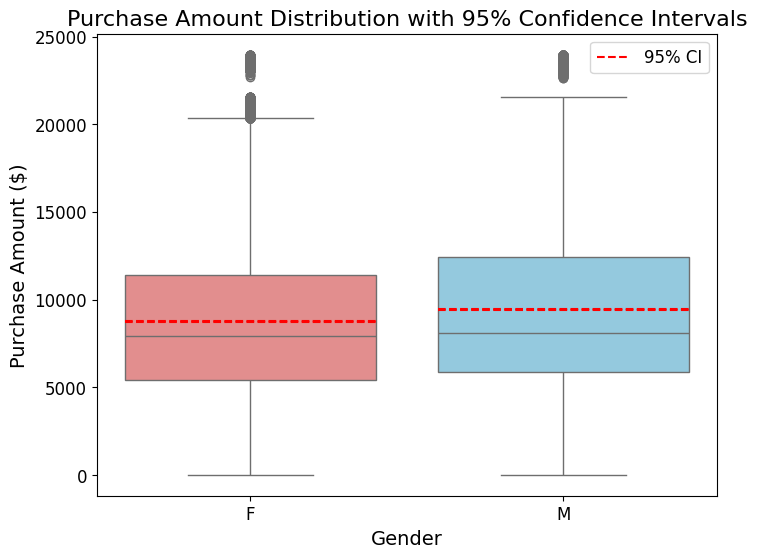

In [14]:
# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase', data=df, palette=['lightcoral', 'skyblue'])

# Add confidence interval lines
for i, gender in enumerate(['F', 'M']):
    plt.hlines(y=female_ci if gender == 'F' else male_ci, xmin=i-0.4, xmax=i+0.4, colors='red', linestyles='dashed', label='95% CI' if i == 0 else "")

# Add labels and title
plt.title("Purchase Amount Distribution with 95% Confidence Intervals", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Purchase Amount ($)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

### **Business Insights and Recommendations**

#### **1. Gender-Based Insights**
- **Insight**: Male customers spend more on average than female customers.
- **Recommendation**:
  - Walmart can target male customers with high-value products or exclusive deals to maximize revenue.
  - For female customers, Walmart can introduce loyalty programs or discounts to increase their average spending.

#### **2. Marital Status-Based Insights**
- **Insight**: Married customers spend slightly more than unmarried customers.
- **Recommendation**:
  - Walmart can create family-oriented promotions or bundle deals to attract married customers.
  - For unmarried customers, Walmart can focus on trendy or individual-focused products.

#### **3. Age-Based Insights**
- **Insight**: Older customers (51-55 and 36-45) spend more than younger customers (0-17 and 18-25).
- **Recommendation**:
  - Walmart can target older customers with premium products or services.
  - For younger customers, Walmart can focus on affordable and trendy products to increase their spending.

---

### **Final Insights**
- **Gender**: Male customers spend more on average than female customers, and the difference is statistically significant.
- **Marital Status**: Married customers spend slightly more than unmarried customers.
- **Age**: Older customers (51-55 and 36-45) spend more than younger customers (0-17 and 18-25).

---

### **Actionable Recommendations**
1. **Target Male Customers**: Introduce high-value products and exclusive deals to maximize revenue from male customers.
2. **Increase Female Spending**: Launch loyalty programs or discounts to encourage female customers to spend more.
3. **Family-Oriented Promotions**: Create bundle deals and family-oriented promotions to attract married customers.
4. **Focus on Older Customers**: Offer premium products and services to older customers (51-55 and 36-45).
5. **Affordable Products for Younger Customers**: Provide affordable and trendy products to increase spending among younger customers (0-17 and 18-25).

---